## Exploration 16. SBR 🎥🎬

<img src = 'https://step.recohut.com/codelabs/session-based-recommender-using-word2vec/img/ce65ffdac5db18bf.png'>

### Table of Contents

### 1. Introduction

* 1.1 What is GRU4REC?
* 1.2 What is Session?
* 1.3 What is UTC?
* 1.4 Metrics used in the Recommendation System

### 2. Experiment Environment Set-up

* 2.1 Import Libraries
* 2.2 Load Data

### 3. Data Preprocess

* 3.1 Change Time Exploration
* 3.2 Definition of SessionID
* 3.3 Session Length
* 3.4 Session Length Visualization
* 3.5 Session Time

### 4. Data Cleansing

* 4.1 Rating
* 4.2 Train / Valid / Test split

### 5. Composition of Mini-Batch

* 5.1 SessionDataset
* 5.2 SessionDataLoader

### 6. Modeling

* 6.1 Evaluation Metric
* 6.2 Model Architecture

### 7. Model Training

* 7.1 Training

### 8. Model Test

* 8.1 Inference

### 9. Attempts to Improve Model Performance

* 9.1 Change Batch Size
* 9.2 Change Drop Rate
* 9.3 Change Learning Rate
* 9.4 Change Epochs

### 10. Retrospection

***

### 1. Introduction

### 1.1 What is GRU4REC?

* 대표적인 Session based Recommendation 모델
* 해당 GRU 모델이, 추천 = RECommendation을 목적으로 한다고 하여 GRU4REC(GRU for Recommendation)라는 이름으로 불린다.
* 알려진 바에 의하면, 세션 기반 추천에서 LSTM보다 GRU가 더 나은 성능을 보여줬다고 한다.
* 모델의 자세한 구조는 [논문](https://arxiv.org/pdf/1511.06939v4.pdf) 참고


* GRU4REC 모델은 
  1. 세션을 시간 순서로 정렬하여 session parallel mini batch 형태로 만들어준다.
  2. 아이템에 대하여 원-핫 인코딩을 하거나 원-핫 인코딩을 하지 않을 경우, embedding layer를 추가한다.
  3. GRU layer와 출력을 위한 dense layer를 쌓는다.
  4. 학습 시, mini batch가 교체될때마다 hidden state를 reset한다.
  5. cost function은 'categorical_crossentropy', 'BPR loss', 'Top1 loss' 를 사용한다.

### 1.2 What is Session?

* **Session-Based Recommendation** : 세션 데이터를 기반으로 **유저가 다음에 클릭 또는 구매할 아이템을 예측하는 추천** 시스템
* **Session** : **일정 시간동안** 같은 사용자(정확하게 브라우저를 말한다)로 부터 들어오는 일련의 요구를 하나의 상태로 보고 그 상태를 일정하게 유지시키는 기술. 또한 여기서 **일정 시간이란 방문자가 웹 브라우저를 통해 웹 서버에 접속한 시점으로부터 웹 브라우저를 종료함으로써 연결을 끝내는 시점**을 말하며, 방문자가 웹서버에 접속해 있는 상태를 하나의 단위로 보고 세션이라고 칭한다.

### 1.3 What is UTC?

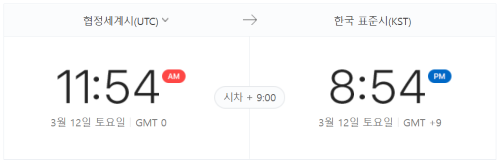
<center>[협정 세계시로 변환] (출처 : 네이버)</center>

* UTC(Universal Time Coordinated, 협정 세계시) : 국제 사회가 사용하는 과학적 시간의 표준으로 1972년 1월 1일부터 시행된 협정세계시는 세슘원자의 진동수에 의거한 초의 길이가 그 기준으로 쓰인다.

### 1.4 Metrics used in the Recommendation System

* 기계학습, 딥러닝 분야에서는 정확도(accuracy), AUC score 등과 같이 모델의 성능을 측정하는 수많은 metric들이 존재한다.
* 하지만 이러한 metric들은 추천시스템에 바로 적용하기에는 무리가 있다. 
* 추천시스템은 아래 두 가지 질문에 대답할 수 있는 metric을 찾아야하기 때문이다.
  1. 추천 시스템이 사용자가 선호하는 아이템을 얼마나 상위권에 잘 올려놓았는가?
  2. 사용자에게 있어 추천된 아이템 간의 상대적인 선호도가 잘 반영되었는가?

**[Rank-less Recommendation Metrics]**

* 추천모델은 단순히 ‘맞았냐 안맞았냐’를 측정하기보단 ‘맞추되 얼마나 상위에 위치시킬 수 있는가?’가 매우 중요하다.
* 추천모델의 핵심은 상위 k개의 추천안에 실제로 사용자가 좋아할만할 아이템을 넣어야한다는 것이다. 
* 따라서 흔히 쓰이는 `precision`, `recall`은 추천 task에서 `precision@k`, `recall@k`라는 변형된 모습으로 사용된다.

>* **`Precision@k`**
k개의 추천 중 실제로 사용자가 선호하는 (relevant) 아이템이 얼마나 존재하는지를 측정하는 지표. 분모는 추천한 아이템의 개수, 분자는 relevant한 아이템의 개수이다. 여기서 Precision의 의미는 “사용자에게 useful한 item을 얼마나 잘 추천해주었는가”이다.

>* **`Recall@k`**
전체 relevant한 아이템 중 추천된 아이템이 속한 비율이다. 분모는 전체 relevant한 아이템의 개수, 분자는 k개의 추천 중 relevant한 아이템의 개수이다. 여기서 recall의 의미는 “useful stuff에 대한 추천을 최대한 놓치지 않는 것”이다.

**[Rank-aware Recommendation Metrics]**

* 위에서의 Rank-less metric의 경우 rank에 따른 상대적인 선호도를 제대로 반영하지 못한다는 단점이 있다.
* 즉, 똑같은 relevant 아이템이라고 하더라도 이를 추천 결과의 첫 번째에서 추천하는 모델과 열 번째에서 추천하는 모델에는 분명히 성능차이가 존재한다고 할 수 있다.
* 아래 metrics들은 추천된 상대적인 위치에 따라서 점수를 차등하여 주고 있는 점이 특징이다.

>* MRR(Mean Reciprocal Rank)
Reciprocal rank는 첫 번째로 등장하는 relevant한 아이템이 우리의 추천상 몇 번째에 위치하는지를 나타내는 지표이다. 하지만 그대로 몇 번째인지를 사용하면 앞에 나올 수록 좋은 모델이라는 것을 반대로 표현하게되니 역수를 취해주게 된다. 하지만 MRR은 추천 상의 몇 개의 relevant아이템이 나오든 첫 번째로 나오는 relevant 아이템만 신경쓴다는 단점을 가지고있다.
 <img src = 'https://miro.medium.com/max/700/1*0xdZ-NWJLlf3m4oyjh0K5g.png' height='500' width='500'>

>* MAP(Mean Average Precision)

>* nDCG(normalized Discounted Cumulative Gain)

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [1]:
import os
import tensorflow
import numpy as np
import pandas as pd
import datetime as dt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

### 2.2 Load Data

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬
data

,UserId,ItemId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


* 이 데이터셋은 명확한 1회 세션의 SessionID를 포함하지 않고 있다.
* Rating 정보가 포함되어 있다. 직전에 봤던 영화가 맘에 들었는지가 비슷한 영화를 더 고르게 하는 것과 상관이 있을 수도 있습니다. 따라서, Rating이 낮은 데이터를 어떻게 처리할지도 고민해야 한다.
* Time 항목에는 UTC time 가 포함되어, 1970년 1월 1일부터 경과된 초 단위 시간이 기재되어 있다.

### 3. Data Preprocess

* 로드한 데이터셋을  살펴보면서 항목별 기본 분석, session length, session time, cleaning 등의 작업을 진행한다.
* 특히, 이 데이터셋에서는 Session이 아닌 UserID 단위로 데이터가 생성되어 있으므로, 이를 Session 단위로 어떻게 해석할지에 고려해본다.

### 3.1 Change Time Exploration

* Time 항목에는 UTC time이 포함되어, 1970년 1월 1일부터 경과된 초단위 시간이 기재되어 있다. 이를 보기 편하게 datetime 형식으로 바꾼다. 

In [3]:
#Time 데이터(Second)를 Datetime으로 바꾸기

from datetime import date
start = '1970-01-01 00:00:00.000000'
start = dt.datetime.strptime(start, '%Y-%m-%d %H:%M:%S.%f')
print(start)

1970-01-01 00:00:00


In [4]:
from datetime import timedelta

date = []
for delta in data['Time'] :
    date.append(start + timedelta(seconds = delta))
    
data['Time'] = date

data['Time']

31        2000-12-31 22:00:19
22        2000-12-31 22:00:55
27        2000-12-31 22:00:55
37        2000-12-31 22:00:55
24        2000-12-31 22:01:43
                  ...        
1000019   2001-08-10 14:40:29
999988    2001-08-10 14:41:04
1000172   2001-08-10 14:41:04
1000167   2001-08-10 14:41:26
1000042   2001-08-20 13:44:15
Name: Time, Length: 1000209, dtype: datetime64[ns]

In [5]:
#data를 UserId와 Time으로 오름차순 정렬
data.sort_values(['UserId', 'Time'], inplace= True)

data.head()

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 31 to 1000042
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   UserId  1000209 non-null  int32         
 1   ItemId  1000209 non-null  int32         
 2   Rating  1000209 non-null  int32         
 3   Time    1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3)
memory usage: 26.7 MB


### 3.2 Definition of SessionID

* 이번에 사용하는 Data Set은 Session 대신 UserID 단위로 데이터가 생성되어 있다. 
* UserID가 SessionID 역할을 할 수 있도록 **Session의 기준을 설정**한다.
* UserID로 구분하면 Time을 구분할 수 없고, Time으로 구분하면 User를 구분할 수 없다. 
* 따라서, UserID와 Time 두 가지를 사용해 하나의 Session으로 정의한다. (상단 Session 정의 참고)

In [7]:
# UserId와 Time을 기준으로 새로운 데이터프레임 생성
df = data.groupby(['UserId', 'Time'])['ItemId'].count().reset_index()
df.reset_index(inplace=True)
df

,index,UserId,Time,ItemId
0,0,1,2000-12-31 22:00:19,1
1,1,1,2000-12-31 22:00:55,3
2,2,1,2000-12-31 22:01:43,1
3,3,1,2000-12-31 22:02:52,1
4,4,1,2000-12-31 22:04:35,1
...,...,...,...,...
471158,471158,6040,2001-08-10 14:39:58,1
471159,471159,6040,2001-08-10 14:40:29,1
471160,471160,6040,2001-08-10 14:41:04,2
471161,471161,6040,2001-08-10 14:41:26,1


In [8]:
# SessionId 컬럼 추가
data = pd.merge(data, df, on=['UserId', 'Time'])
# 불필요한 칼럼 삭제
data.drop(columns='ItemId_y', inplace=True)
# 칼럼 명 수정
data.columns = ['UserId', 'ItemId', 'Rating', 'Time', 'SessionId']
data

,UserId,ItemId,Rating,Time,SessionId
0,1,3186,4,2000-12-31 22:00:19,0
1,1,1270,5,2000-12-31 22:00:55,1
2,1,1721,4,2000-12-31 22:00:55,1
3,1,1022,5,2000-12-31 22:00:55,1
4,1,2340,3,2000-12-31 22:01:43,2
...,...,...,...,...,...
1000204,6040,2917,4,2001-08-10 14:40:29,471159
1000205,6040,1921,4,2001-08-10 14:41:04,471160
1000206,6040,1784,3,2001-08-10 14:41:04,471160
1000207,6040,161,3,2001-08-10 14:41:26,471161


<AxesSubplot:>

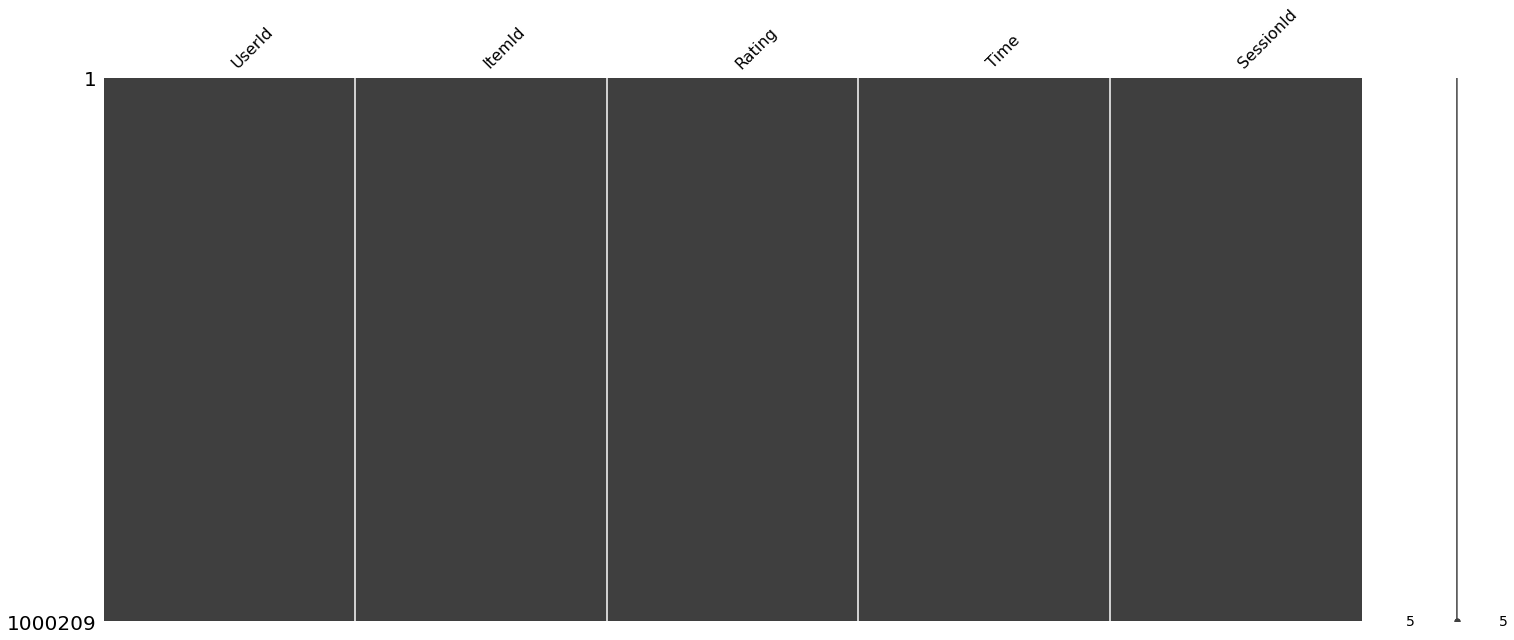

In [9]:
msno.matrix(data)

In [10]:
print(f"Number of Data : {len(data)}")
print(f"Number of Sessions : {data['SessionId'].nunique()}")
print(f"Number of Movies : {data['ItemId'].nunique()}")
print(f"Rating : {data['Rating'].unique()}")

Number of Data : 1000209
Number of Sessions : 471163
Number of Movies : 3706
Rating : [4 5 3 2 1]


### 3.3 Session Length

* `session_length`란 같은 `SessionId`를 공유하는 데이터 row의 개수를 의미한다.
* 위의 표를 보면 SessionId가 1인 데이터 row의 수는 3이므로 SessionId가 1일 때는 3으로 대응된다.
* 여기서 `session_length`란 해당 세션의 사용자가 그 세션 동안 몇 번의 액션을 취했는지(몇 개의 영화에 평점을 남겼는지)의 의미가 된다.

In [11]:
session_length = data.groupby('SessionId').size()
session_length

SessionId
0         1
1         3
2         1
3         1
4         1
         ..
471158    1
471159    1
471160    2
471161    1
471162    1
Length: 471163, dtype: int64

In [12]:
print('Session_length Median :', session_length.median())
print('Session_length Mean :', session_length.mean())
print('Session_length Min :', session_length.min())
print('Session_length Max :', session_length.max())

Session_length Median : 2.0
Session_length Mean : 2.1228513274599234
Session_length Min : 1
Session_length Max : 30


In [13]:
print('99.9% of All Sessions :', session_length.quantile(0.999))

99.9% of All Sessions : 10.0


In [14]:
long_session = session_length[session_length==30].index[0]
data[data['SessionId']==long_session]

,UserId,ItemId,Rating,Time,SessionId
112347,731,3044,4,2000-11-29 20:06:42,55117
112348,731,1455,3,2000-11-29 20:06:42,55117
112349,731,1639,5,2000-11-29 20:06:42,55117
112350,731,3244,4,2000-11-29 20:06:42,55117
112351,731,1656,2,2000-11-29 20:06:42,55117
112352,731,3426,4,2000-11-29 20:06:42,55117
112353,731,1829,2,2000-11-29 20:06:42,55117
112354,731,2675,4,2000-11-29 20:06:42,55117
112355,731,802,3,2000-11-29 20:06:42,55117
112356,731,803,5,2000-11-29 20:06:42,55117


In [15]:
# 한 SessionId가 동시간에 30개의 영화를 평가한 것은 제대로 된 평가라고 생각하지 않는다.
# session_length==30 제거
data = data.loc[data['SessionId'] != long_session]

data

,UserId,ItemId,Rating,Time,SessionId
0,1,3186,4,2000-12-31 22:00:19,0
1,1,1270,5,2000-12-31 22:00:55,1
2,1,1721,4,2000-12-31 22:00:55,1
3,1,1022,5,2000-12-31 22:00:55,1
4,1,2340,3,2000-12-31 22:01:43,2
...,...,...,...,...,...
1000204,6040,2917,4,2001-08-10 14:40:29,471159
1000205,6040,1921,4,2001-08-10 14:41:04,471160
1000206,6040,1784,3,2001-08-10 14:41:04,471160
1000207,6040,161,3,2001-08-10 14:41:26,471161


### 3.4 Session Length Visualization

* `session_length`를 시각화해본다.

In [16]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

1    0.480048
2    0.713936
3    0.847350
4    0.919684
5    0.958639
6    0.979132
7    0.989772
8    0.994989
9    0.997604
dtype: float64

* 전체 세션 길이의 분포 누적합 확인

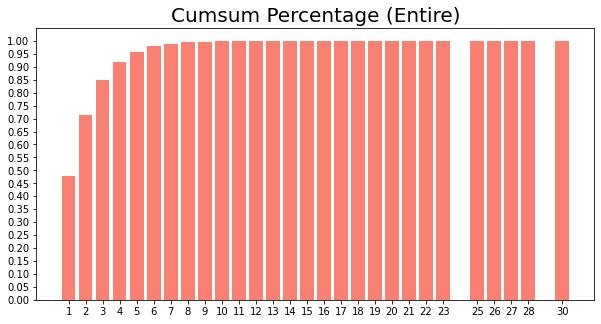

In [17]:
# 전체 분포 누적합 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(x=length_percent_cumsum.index,
        height=length_percent_cumsum, color='salmon')
plt.xticks(length_percent_cumsum.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage (Entire)', size=20)
plt.show()

* 세션 길이 기준 하위 99.9%까지의 분포 누적합을 시각화

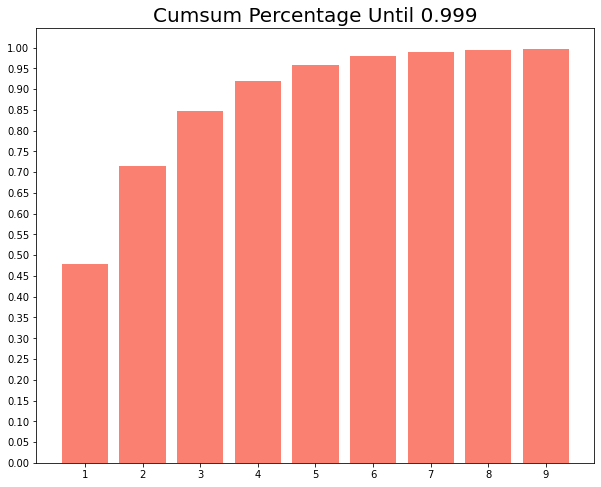

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='salmon')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

* 세션의 길이가 9 이하인 데이터들에 대해서만 그래프를 출력
* 약 99% 데이터들의 세션 길이가 9 이하 임을 확인

### 3.5 Session Time

* 데이터의 시간 관련 정보를 확인한다.

In [19]:
oldest, latest = data['Time'].min(), data['Time'].max()   # Time 데이터의 초단위 최솟값, 최댓값
print(oldest) 
print(latest)

2000-04-25 23:05:32
2003-02-28 17:49:50


* 해당 데이터는 약 3년치의 데이터들이 포함되어 있음

In [20]:
target_year = 2000
time2000_counts = data[data['Time'].dt.year==target_year]
print('Number of 2000 Data :', len(time2000_counts))

Number of 2000 Data : 904727


In [21]:
target_year = 2001
time2001_counts = data[data['Time'].dt.year==target_year]
print('Number of 2001 Data :', len(time2001_counts))

Number of 2001 Data : 68058


In [22]:
target_year = 2002
time2002_counts = data[data['Time'].dt.year==target_year]
print('Number of 2002 Data :', len(time2002_counts))

Number of 2002 Data : 24046


In [23]:
target_year = 2003
time2003_counts = data[data['Time'].dt.year==target_year]
print('Number of 2003 Data :', len(time2003_counts))

Number of 2003 Data : 3348


* 2000년이 가장 많고 연도가 지날수록 데이터 수가 줄어드는 것을 볼 수 있음.
* 영화의 경우 유행을 많이 타므로 최근 데이터 2년치를 사용한다.

In [24]:
year_ago = latest - dt.timedelta(365*2)     # 최종 날짜로부터 365일*2(2년) 이전 날짜를 구한다.  
data = data[data['Time'] > year_ago]   # 방금 구한 날짜 이후의 데이터만 모은다. 
data

,UserId,ItemId,Rating,Time,SessionId
2498,19,318,4,2001-07-08 01:43:18,1287
2499,19,1234,5,2001-07-08 01:43:56,1288
2513,20,1694,3,2001-12-29 23:37:51,1297
2514,20,1468,3,2001-12-29 23:37:51,1297
2515,20,3717,2,2001-12-29 23:37:51,1297
...,...,...,...,...,...
1000204,6040,2917,4,2001-08-10 14:40:29,471159
1000205,6040,1921,4,2001-08-10 14:41:04,471160
1000206,6040,1784,3,2001-08-10 14:41:04,471160
1000207,6040,161,3,2001-08-10 14:41:26,471161


In [25]:
oldest, latest = data['Time'].min(), data['Time'].max() 
print(oldest) 
print(latest)

2001-02-28 19:06:53
2003-02-28 17:49:50


### 4. Data Cleansing

### 4.1 Rating

* Rating의 정보를 확인한다.
* Rating은 최고 5점으로 시청한 영화가 마음에 들었는지 여부를 판단한다.
* Rating이 낮은 데이터(1, 2점)는 삭제를 한다.

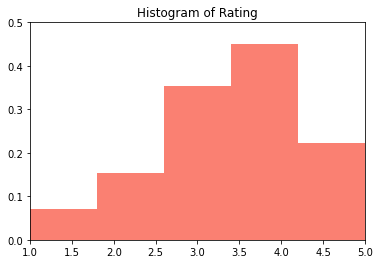

In [26]:
plt.hist(data['Rating'], density=True,bins=5, color='salmon')
plt.title('Histogram of Rating')
plt.axis([1, 5, 0, 0.5])
plt.show()

In [27]:
# 1, 2등급의 데이터 개수
low_Rating = data[data['Rating'] < 3]
print(len(low_Rating))

12427


In [28]:
# 1, 2등급 삭제
data = data[data['Rating']>=3]
data

,UserId,ItemId,Rating,Time,SessionId
2498,19,318,4,2001-07-08 01:43:18,1287
2499,19,1234,5,2001-07-08 01:43:56,1288
2513,20,1694,3,2001-12-29 23:37:51,1297
2514,20,1468,3,2001-12-29 23:37:51,1297
2516,20,2858,4,2001-12-29 23:37:51,1297
...,...,...,...,...,...
1000204,6040,2917,4,2001-08-10 14:40:29,471159
1000205,6040,1921,4,2001-08-10 14:41:04,471160
1000206,6040,1784,3,2001-08-10 14:41:04,471160
1000207,6040,161,3,2001-08-10 14:41:26,471161


### 4.2 Train / Valid / Test split

* last_time에서 약 3개월(100days) 전까지를 test set으로, last_time에서 약 6개월(200days) 전까지를 validation으로 나눈다. 

In [29]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index

    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [30]:
# test dataset 분리
tr, test = split_by_date(data, n_days = 100)

In [31]:
# validation dataset 분리
tr, val = split_by_date(tr, n_days = 100)

In [32]:
# data에 대한 정보.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [33]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 48436
	 Sessions: 33154
	 Items: 3142
	 First Time : 2001-02-28 19:06:53
	 Last Time : 2002-08-12 13:53:29

* valid Set Stats Info
	 Events: 4333
	 Sessions: 3123
	 Items: 1698
	 First Time : 2002-08-13 00:40:06
	 Last Time : 2002-11-20 16:38:40

* test Set Stats Info
	 Events: 4093
	 Sessions: 3052
	 Items: 1601
	 First Time : 2002-11-20 20:30:02
	 Last Time : 2003-02-28 17:49:50



In [34]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [35]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

### 5. Composition of Mini-Batch

* Session-Parallel Mini-Batch의 개념에 따라, 학습 속도의 저하가 최소화될 수 있도록 구성한다.

### 5.1 SessionDataset

In [36]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

In [37]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,UserId,ItemId,Rating,Time,SessionId,item_idx
2498,19,318,4,2001-07-08 01:43:18,1287,0
2499,19,1234,5,2001-07-08 01:43:56,1288,1
2513,20,1694,3,2001-12-29 23:37:51,1297,2
2514,20,1468,3,2001-12-29 23:37:51,1297,3
2516,20,2858,4,2001-12-29 23:37:51,1297,4
2517,20,2641,4,2001-12-29 23:38:35,1298,5
2518,20,1375,3,2001-12-29 23:38:35,1298,6
2519,20,3753,5,2001-12-29 23:38:36,1299,7
2520,20,3527,4,2001-12-29 23:39:41,1300,8
2521,20,1527,5,2001-12-29 23:39:41,1300,9


In [38]:
tr_dataset.click_offsets

array([    0,     1,     2, ..., 48434, 48435, 48436], dtype=int32)

In [39]:
tr_dataset.session_idx

array([    0,     1,     2, ..., 33151, 33152, 33153])

### 5.2 SessionDataLoader

In [40]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize() 
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져온다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둔다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져온다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져온다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해준다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻. mask에 기록

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돈다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점 기록
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치 기록
        return start, end, mask, last_session, finished

In [41]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(10)

,UserId,ItemId,Rating,Time,SessionId,item_idx
2498,19,318,4,2001-07-08 01:43:18,1287,0
2499,19,1234,5,2001-07-08 01:43:56,1288,1
2513,20,1694,3,2001-12-29 23:37:51,1297,2
2514,20,1468,3,2001-12-29 23:37:51,1297,3
2516,20,2858,4,2001-12-29 23:37:51,1297,4
2517,20,2641,4,2001-12-29 23:38:35,1298,5
2518,20,1375,3,2001-12-29 23:38:35,1298,6
2519,20,3753,5,2001-12-29 23:38:36,1299,7
2520,20,3527,4,2001-12-29 23:39:41,1300,8
2521,20,1527,5,2001-12-29 23:39:41,1300,9


In [42]:
iter_ex = iter(tr_data_loader)

In [43]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [16  8  2  5]
Label Item Idx are :       [17  9  3  6]
Previous Masked Input Idx are [0]


### 6. Modeling

### 6.1 Evaluation Metric

In [44]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

### 6.2 Model Architecture

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [46]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [47]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=256, hsz=50, drop_rate=0.1, lr=0.00001, epochs=30, k=10)

In [48]:
model = create_model(args)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(256, 1, 3142)]          0         
_________________________________________________________________
GRU (GRU)                    [(256, 50), (256, 50)]    479100    
_________________________________________________________________
dropout (Dropout)            (256, 50)                 0         
_________________________________________________________________
dense (Dense)                (256, 3142)               160242    
Total params: 639,342
Trainable params: 639,342
Non-trainable params: 0
_________________________________________________________________


### 7. Model Training

### 7.1 Training

In [49]:
# train 셋으로 학습하면서 valid 셋으로 검증
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져온다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져온다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 한다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax 값이 큰 순서대로 sorting 한다.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [50]:
train_model(model, args)

Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.48s/it]


	 - Recall@20 epoch 1: 0.011719
	 - MRR@20    epoch 1: 0.001173



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.34s/it]


	 - Recall@20 epoch 2: 0.013021
	 - MRR@20    epoch 2: 0.001479



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 3: 0.013021
	 - MRR@20    epoch 3: 0.001816



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 4: 0.014323
	 - MRR@20    epoch 4: 0.001931



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.41s/it]


	 - Recall@20 epoch 5: 0.014323
	 - MRR@20    epoch 5: 0.002250



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.38s/it]


	 - Recall@20 epoch 6: 0.016927
	 - MRR@20    epoch 6: 0.002538



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 7: 0.019531
	 - MRR@20    epoch 7: 0.002844



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 8: 0.020833
	 - MRR@20    epoch 8: 0.003048



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.33s/it]


	 - Recall@20 epoch 9: 0.020833
	 - MRR@20    epoch 9: 0.003777



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.34s/it]


	 - Recall@20 epoch 10: 0.027344
	 - MRR@20    epoch 10: 0.004059



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.39s/it]


	 - Recall@20 epoch 11: 0.032552
	 - MRR@20    epoch 11: 0.004429



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.31s/it]


	 - Recall@20 epoch 12: 0.035156
	 - MRR@20    epoch 12: 0.004493



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 13: 0.035156
	 - MRR@20    epoch 13: 0.004322



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.34s/it]


	 - Recall@20 epoch 14: 0.037760
	 - MRR@20    epoch 14: 0.004501



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 15: 0.036458
	 - MRR@20    epoch 15: 0.004137



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.32s/it]


	 - Recall@20 epoch 16: 0.035156
	 - MRR@20    epoch 16: 0.004207



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.36s/it]


	 - Recall@20 epoch 17: 0.032552
	 - MRR@20    epoch 17: 0.004561



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.35s/it]


	 - Recall@20 epoch 18: 0.031250
	 - MRR@20    epoch 18: 0.004681



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.32s/it]


	 - Recall@20 epoch 19: 0.027344
	 - MRR@20    epoch 19: 0.005278



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.33s/it]


	 - Recall@20 epoch 20: 0.026042
	 - MRR@20    epoch 20: 0.006078



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.40s/it]


	 - Recall@20 epoch 21: 0.027344
	 - MRR@20    epoch 21: 0.006364



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.38s/it]


	 - Recall@20 epoch 22: 0.028646
	 - MRR@20    epoch 22: 0.006260



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.31s/it]


	 - Recall@20 epoch 23: 0.028646
	 - MRR@20    epoch 23: 0.006264



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.30s/it]


	 - Recall@20 epoch 24: 0.028646
	 - MRR@20    epoch 24: 0.006452



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.40s/it]


	 - Recall@20 epoch 25: 0.029948
	 - MRR@20    epoch 25: 0.007872



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.33s/it]


	 - Recall@20 epoch 26: 0.029948
	 - MRR@20    epoch 26: 0.008143



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.32s/it]


	 - Recall@20 epoch 27: 0.031250
	 - MRR@20    epoch 27: 0.008823



Evaluation:  75%|███████▌  | 3/4 [00:03<00:01,  1.31s/it]


	 - Recall@20 epoch 28: 0.029948
	 - MRR@20    epoch 28: 0.008694



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.35s/it]


	 - Recall@20 epoch 29: 0.028646
	 - MRR@20    epoch 29: 0.008600



Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.34s/it]

	 - Recall@20 epoch 30: 0.027344
	 - MRR@20    epoch 30: 0.008476



### 8. Model Test

### 8.1 Inference

In [51]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  75%|███████▌  | 3/4 [00:04<00:01,  1.38s/it]

	 - Recall@20: 0.053385
	 - MRR@20: 0.008597



### 9. Attempts to Improve Model Performance

* Basic Line으로 시도한 하이퍼파라미터 값은 아래와 같다.
* `batch_size` = 1042, `hsz` = 50, `drop_rate`= 0.1, `lr` = 0.001, `epochs` = 10, `k` = 10
* 다양한 하이퍼파라미터들 중 `batch_size`, `drop_rate`, `lr`, `epochs`. 4가지 변경을 통해 개선을 시도해본다.

**[Initial value]**

>* batch_size = 2048
>* drop_rate = 0.1
>* Ir = 0.001
>* epoch = 10

* 학습이 제대로 진행되지 않음.
* Recall@10 : nan
* MRR@10 : nan
* `Attachment_1.Basic Line` 참조

### 9.1 Change Batch Size

* `batch_size`를 변경하여 결과를 확인해본다.
* `batch_size` 외 다른 하이퍼파라미터는 Initial value와 동일하게 고정시킨다.

|Batch Size|Recall@10|MRR@10|
| :--: | :--: | :--: |
| 1024 | nan | nan |
| 512 | 0.068359 | 0.013520 |
| 256 | 0.084635 | 0.016861 |
| 128 | 0.088170 | 0.020149 |
| 64 | 0.093750 | 0.031603 |
| 32 | 0.123047 | 0.040004 |
| 16 | 0.125000 | 0.044584 |
| 8 | **0.131731** | **0.056849** |

* 학습이 진행될수록 `train loss`가 더 낮아지는 것을 확인할 수 있었다.
* `batch_size` = 8일 때, 모델의 성능이 가장 좋은 것을 확인할 수 있다.
* 이후 시도들은 `batch_size` = 32, 16, 8인 경우로 나눠 진행한다.

### 9.2 Change Drop Rate

* `drop_rate`를 변경하여 결과를 확인해본다.
* `batch_size`와 `drop_rate` 외 다른 하이퍼파라미터는 Initial value와 동일하게 고정시킨다. (`batch_size` = 32, 16, 8의 경우만)

|Batch Size|Drop Rate|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: |
| 32 | 0.1 | **0.123047** | **0.040004** |
| 32 | 0.2 | 0.115234 | 0.037378 |
| 32 | 0.3 | 0.104492 | 0.039110 |
| 32 | 0.4 | 0.110352 | 0.039674 |
| 32 | 0.5 | 0.114258 | 0.035163 |
| 16 | 0.1 | 0.125000 | 0.044584 |
| 16 | 0.2 | 0.138462 | 0.052287 |
| 16 | 0.3 | **0.140385** | **0.054475** |
| 16 | 0.4 | 0.129808 | 0.050815 |
| 16 | 0.5 | 0.131731 | 0.055275 |
| 8 | 0.1 | 0.131731 | 0.056849 |
| 8 | 0.2 | 0.131731 | 0.053678 |
| 8 | 0.3 | 0.130769 | 0.056547 |
| 8 | 0.4 | **0.146154** | **0.066567** |
| 8 | 0.5 | 0.142308 | 0.061357 |

* 학습이 진행될수록 `train loss`가 더 낮아지는 것을 확인할 수 있었다.
* `batch_size` = 32인 경우에는 `drop_rate` =  0.1, `batch_size` = 16인 경우에는 `drop_rate` =  0.3, `batch_size` = 8인 경우에는 `drop_rate` =  0.4 일 때 가장 좋은 성능을 보였다.

### 9.3 Change Learning Rate

* `lr`를 변경하여 결과를 확인해본다.
* 위에서 확인된 결과들을 반영하여 `batch_size` = 32, 16, 8, `drop_rate` = 0.1, 0.3, 0.4로 시도하며,
* 그 외 다른 하이퍼파라미터는 Initial value와 동일하게 고정시킨다.

**[`batch_size` = 32]**

|Batch Size|Drop Rate|Learning Rate|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: |
| **32** | **0.1** | **0.001** | **0.123047** | **0.040004** |
| 32 | 0.3 | 0.001 | 0.104492 | 0.039110 |
| 32 | 0.4 | 0.001 | 0.110352 | 0.039674 |
| 32 | 0.1 | 0.0001 | 0.069336 | 0.011357 |
| 32 | 0.3 | 0.0001 | 0.074219 | 0.010979 |
| 32 | 0.4 | 0.0001 | 0.072266 | 0.011142 |
| 32 | 0.1 | 0.00001 | 0.042969 | 0.006998 |
| 32 | 0.3 | 0.00001 | 0.041016 | 0.009155 |
| 32 | 0.4 | 0.00001 | 0.059570 | 0.012196 |

**[`batch_size` = 16]**

|Batch Size|Drop Rate|Learning Rate|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: |
| 16 | 0.1 | 0.001 | 0.125000 | 0.044584 |
| **16** | **0.3** | **0.001** | **0.140385** | **0.054475** |
| 16 | 0.4 | 0.001 | 0.129808 | 0.050815 |
| 16 | 0.1 | 0.0001 | 0.073077 | 0.011766 |
| 16 | 0.3 | 0.0001 | 0.075000 | 0.011946 |
| 16 | 0.4 | 0.0001 | 0.071154 | 0.011140 |
| 16 | 0.1 | 0.00001 | 0.053846 | 0.007774 |
| 16 | 0.3 | 0.00001 | 0.068269 | 0.011776 |
| 16 | 0.4 | 0.00001 | 0.069231 | 0.009773 |

**[`batch_size` = 8]**

|Batch Size|Drop Rate|Learning Rate|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: |
| 8 | 0.1 | 0.001 | 0.131731 | 0.056849 |
| 8 | 0.3 | 0.001 | 0.130769 | 0.056547 |
| **8** | **0.4** | **0.001** | **0.146154** | **0.066567** |
| 8 | 0.1 | 0.0001 | 0.076923 | 0.015236 |
| 8 | 0.3 | 0.0001 | 0.075962 | 0.015285 |
| 8 | 0.4 | 0.0001 | 0.075000 | 0.014159 |
| 8 | 0.1 | 0.00001 | 0.066346 | 0.011699 |
| 8 | 0.3 | 0.00001 | 0.060577 | 0.014750 |
| 8 | 0.4 | 0.00001 | 0.059615 | 0.007622 |

* 학습이 진행될수록 `train loss`가 더 낮아지는 것을 확인할 수 있었다.
* `batch_size` = 32인 경우에는 `drop_rate` =  0.1, `lr` = 0.001일 때, `batch_size` = 16인 경우에는 `drop_rate` =  0.3, `lr` = 0.001일 때, `batch_size` = 8인 경우에는 `drop_rate` =  0.4, `lr` = 0.001일 때가 가장 좋은 성능을 보였다.

### 9.4 Change Epochs

* `epochs`를 변경하여 결과를 확인해본다.
* 위에서 확인된 결과들을 바탕으로 3가지 경우에서 `epochs`를 늘려본다.

|Batch Size|Drop Rate|Learning Rate|Epochs|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: | :--: |
| 32 | 0.1 | 0.001 | 5 | 0.071289 | 0.018190 |
| 32 | 0.1 | 0.001 | 10 | 0.056849 | 0.040004 |
| 32 | 0.1 | 0.001 | 15 | 0.128906 | 0.053002 |
| 32 | 0.1 | 0.001 | 20 | 0.146484 | 0.062312 |
| 16 | 0.3 | 0.001 | 5 | 0.074038 | 0.024525 |
| 16 | 0.3 | 0.001 | 10 | 0.140385 | 0.054475 |
| 16 | 0.3 | 0.001 | 15 | **0.16634**6 | 0.062244 |
| 16 | 0.3 | 0.001 | 20 | 0.159615 | **0.069308** |
| 8 | 0.4 | 0.001 | 5 | 0.107692 | 0.036774 |
| 8 | 0.4 | 0.001 | 10 | 0.146154 | 0.066567 |
| 8 | 0.4 | 0.001 | 15 | 0.152885 | 0.065509 |
| 8 | 0.4 | 0.001 | 20 | 0.156731 | 0.069026 |

* 최종적으로 `batch_size` = , `drop_rate` =  , `lr` = , `epochs` =  일 때, 가장 좋은 성능을 보였다.

* 학습이 진행됨에 따라 `train loss`가 계속해서 감소하는 것이 확인되었다.
* `epochs`를 더 늘려보아도 될 것 같다 판단되어 `epochs`가 배 이상으로 커지면 어떻게 되는지 확인해보았다.

|Batch Size|Drop Rate|Learning Rate|Epochs|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: | :--: |
| 16 | 0.3 | 0.001 | 50 | 0.153846 | 0.062743 |

* 8.02에서 시작했던 `train loss`가  1.28까지 감소하는 것을 볼 수 있었다.
* 그러나 오히려 평가 지표는 15, 20 epochs 일 때보다 더 좋지 않았다.
* `epochs`가 늘어난다고 해서 평가 지표가 좋아지는 것은 아님을 확인할 수 있다. 

### 9.4 Change Session Time

* 이때까지는 2년치 데이터를 대상으로 진행했다.
* 3개월, 6개월치 데이터로 평가를 진행해본다.

|Data Month|Batch Size|Drop Rate|Learning Rate|Epochs|Recall@10|MRR@10|
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 24 | 16 | 0.3 | 0.001 | 20 | 0.159615 | 0.069308 |
| 6 | 16 | 0.3 | 0.001 | 20 | 0.058333 | 0.008237 |
| 3 | 16 | 0.3 | 0.001 | 20 | 0.104167 | 0.026835 |

* 3개월 및 6개월치 데이터를 앞에서 성능이 가장 잘 나온 파라미터로 학습을 시켰을 때 위와 같은 결과가 나타났다.
* 결과만 놓고 봤을 때 2년, 3개월, 6개월 순으로 성능이 잘 나타났다.
* 하지만 하이퍼파라미터들이 2년치 데이터에 맞춰진 값들이다보니 3개월 및 6개월치 데이터에는 적절하지 않은 것 같다.

### 10. Retrospection

### 10.1 What was difficult

* LMS에서는 평가지표(Recall, MRR) 값에 따른 성능 개선 관련 내용이 상세하게 나와 있지 않아 '성능이 개선되었다' 의 기준을 정확하게 이해하지는 못 했다.
* 인덱스가 축범위를 벗어났다는 에러가 떠서 원인을 찾아보았으나 정확한 원인은 찾을 수 없었다.

### 10.2 What I found out

* `cumsum()`는 누적 합을 도출하는 함수이다.
* 추천 시스템에서 사용되는 다양한 성능평가 지표 (1. Introduction 참조)
* Session의 정확한 의미 (1. Introduction 참조)

### 10.3 What I want to know more about

* 이번에는 Classification Task로 보고 Cross-Entropy Loss를 사용해 모델을 구현했다.
* 하지만 논문에서는 Ranking Loss를 사용했었다.
* 논문에서 사용된 Loss를 사용해보고 싶었으나 시간 제약 상 진행하지 못했다.
* 기회가 된다면 한 번 시도해보고 싶다.
* https://github.com/hidasib/GRU4Rec
* https://github.com/flowel1/gru4rec-keras/blob/master/Gru4Rec_Keras.ipynb

### 10.4 Self-Resolution

* 코드를 자세히 살펴보고 싶었으나,
* 시간이 없어서 노드에서 진행된 그대로 진행을 했다.
* Exploration은 끝냈지만 뭔가 더 공부해야 할 것 같은 느낌이 든다.

**[References]**

* https://88240.tistory.com/190
* https://blog.naver.com/stu5073/222208516966
* https://zzaebok.github.io/recommender_system/metrics/rec_metrics/